In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib   
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
filename = 'eg2d3data.xls'
data = pd.read_excel(filename)
data.head()

,y,x1,x2,x3
0,33.2,3.5,9,6.1
1,40.3,5.3,20,6.4
2,38.7,5.1,18,7.4
3,46.8,5.8,33,6.7
4,41.4,4.2,31,7.5


In [3]:
# 回归拟合
Y = data['y'].values
X = sm.add_constant(data[['x1', 'x2', 'x3']].values)

model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     69.98
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           8.80e-11
Time:                        17:37:04   Log-Likelihood:                -45.041
No. Observations:                  24   AIC:                             98.08
Df Residuals:                      20   BIC:                             102.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6249      1.999      8.817      0.000      13.455      21.795
x1             1.1281      0.326      3.461      0.002       0.448       1.808
x2             0.3233      0.036      8.902      0.000       0.248       0.399
x3             1.3034      0.294      4.440      0.000       0.691       1.916
==============================================================================
Omnibus:                        0.554   Durbin-Watson:                   2.383
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.418
Skew:                          -0.299   Prob(JB):                        0.811
Kurtosis:                       2.751   Cond. No.                         161.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 例2.5 残差分析频率检验

In [4]:
# 计算残差
y_hat = results.predict()
e_hat = results.resid
print(e_hat)

[ 0.76631766  1.8887149  -0.14255293  3.23112549 -0.76009252  1.21363361
 -2.19843552  1.95862969 -0.19832903  1.14050242  0.8996636  -3.25061391
 -0.69112516 -0.28081885 -1.3951534  -0.72270728  0.14899847  0.42347044
 -3.27240164  1.20134734 -0.93551223 -1.47540288  0.74151415  1.70922758]


In [5]:
# 转化成 学生化残差

# 计算方差 
n = len(Y)
SSE = sum((e_hat)**2)
s2_hat = SSE/(n-4)

# H矩阵 
H = X @ np.linalg.inv(X.T @ X) @ X.T
h = np.diagonal(H)

# 计算学生化残差
r = np.array([e_hat[i]/(np.sqrt(s2_hat*(1-h[i]))) for i in range(n)])

# 输出
for i in range(n):
    print(f'r({i}) = {round(r[i], 4)}')

r(0) = 0.49
r(1) = 1.1247
r(2) = -0.0883
r(3) = 1.9354
r(4) = -0.4922
r(5) = 0.7588
r(6) = -1.3526
r(7) = 1.2489
r(8) = -0.1316
r(9) = 0.7827
r(10) = 0.5424
r(11) = -2.0106
r(12) = -0.4882
r(13) = -0.1705
r(14) = -0.8947
r(15) = -0.4531
r(16) = 0.1004
r(17) = 0.2655
r(18) = -2.1001
r(19) = 0.7789
r(20) = -0.5756
r(21) = -0.9169
r(22) = 0.4835
r(23) = 1.0468


In [6]:
counter = [0, 0, 0]
# 频率检测法检验
for i in range(3):
    l = np.logical_and(r > -i*0.5 -1, r < i*0.5 +1)
    counter[i] = sum(l)

for i in range(3):
    print(f'区间内计数counter{i} = {counter[i]}')
    print(f'区间 [-{i*0.5+1}, {i*0.5+1}] 内频率为 {counter[i]/n:.2%}')
    print()

区间内计数counter0 = 17
区间 [-1.0, 1.0] 内频率为 70.83%

区间内计数counter1 = 21
区间 [-1.5, 1.5] 内频率为 87.50%

区间内计数counter2 = 22
区间 [-2.0, 2.0] 内频率为 91.67%



# 例2.6 正态QQ图检验

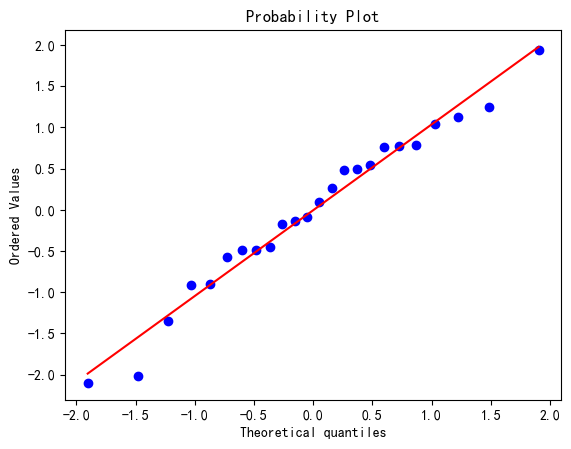

In [7]:
# 学生化残差按从小到大排列
r_sort = sorted(r)

# 绘制QQ图
Q = stats.probplot(r_sort, plot=plt) # 返回值中有一个元组其中包括理论分位数数组、有序组r_sort


((array([-1.90380091, -1.48287381, -1.22601535, -1.03156092, -0.8698858 ,
         -0.7282709 , -0.59996024, -0.48085763, -0.36822879, -0.26009875,
         -0.154935  , -0.05146182,  0.05146182,  0.154935  ,  0.26009875,
          0.36822879,  0.48085763,  0.59996024,  0.7282709 ,  0.8698858 ,
          1.03156092,  1.22601535,  1.48287381,  1.90380091]),
  array([-2.10013671, -2.01057402, -1.35262143, -0.91694836, -0.89470675,
         -0.5755621 , -0.49218188, -0.48818417, -0.45311512, -0.17053297,
         -0.13162064, -0.08833424,  0.10040079,  0.26553866,  0.48354   ,
          0.48998549,  0.54242845,  0.75884375,  0.77892074,  0.78266758,
          1.04677842,  1.12467089,  1.24889852,  1.935381  ])),
 (1.0410496820737476, -0.004852669668453202, 0.9881770577728326))

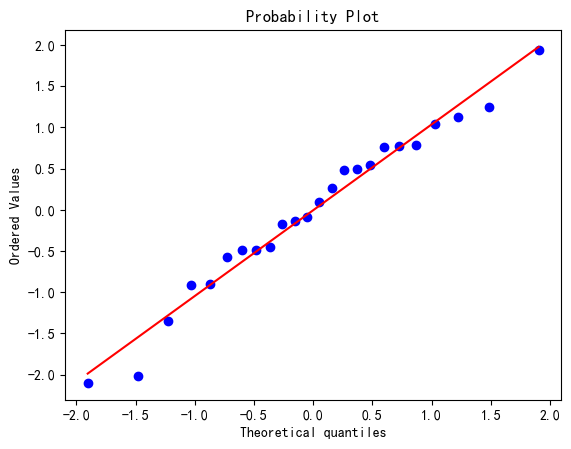

In [8]:
stats.probplot(r_sort, plot=plt)

In [9]:
Q = Q[0][0]
R = r_sort
stats.pearsonr(Q, R)

PearsonRResult(statistic=0.9881770577728325, pvalue=2.0583193451416733e-19)

# 例2.7 残差图分析

In [10]:
x1 = data['x1'].values
x2 = data['x2'].values
x3 = data['x3'].values

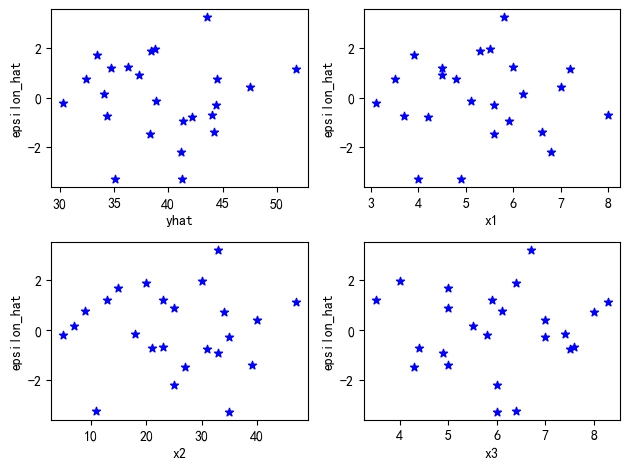

In [11]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].scatter(y_hat, e_hat, marker='*', color='blue')
ax[0, 0].set_ylabel('epsilon_hat')
ax[0, 0].set_xlabel('yhat')

ax[0, 1].scatter(x1, e_hat, marker='*', color='blue')
ax[0, 1].set_ylabel('epsilon_hat')
ax[0, 1].set_xlabel('x1')

ax[1, 0].scatter(x2, e_hat, marker='*', color='blue')
ax[1, 0].set_ylabel('epsilon_hat')
ax[1, 0].set_xlabel('x2')

ax[1, 1].scatter(x3, e_hat, marker='*', color='blue')
ax[1, 1].set_ylabel('epsilon_hat')
ax[1, 1].set_xlabel('x3')

fig.tight_layout()

# 例2.8 Box-Cox变换

In [12]:
filename = 'eg2_8data.xls'
data = pd.read_excel(filename, header=None, names=['x1', 'x2', 'x3', 'x4', 'y'])
data.head()

,x1,x2,x3,x4,y
0,6.7,62,81,2.59,200
1,5.1,59,66,1.70,101
2,7.4,57,83,2.16,204
3,6.5,73,41,2.01,101
4,7.8,65,115,4.30,509


## 不作Box-Cox变换

In [13]:
# 未作变换的回归拟合
Y = data['y'].values
X = sm.add_constant(data[['x1', 'x2', 'x3', 'x4']].values)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     62.79
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.12e-18
Time:                        17:37:15   Log-Likelihood:                -296.04
No. Observations:                  54   AIC:                             602.1
Df Residuals:                      49   BIC:                             612.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -621.5976     64.800     -9.592      0.000    -751.819    -491.376
x1            33.1638      7.017      4.726      0.000      19.062      47.266
x2             4.2719      0.563      7.582      0.000       3.140       5.404
x3             4.1257      0.511      8.071      0.000       3.099       5.153
x4            14.0916     12.525      1.125      0.266     -11.079      39.262
==============================================================================
Omnibus:                       67.426   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              623.889
Skew:                           3.304   Prob(JB):                    3.34e-136
Kurtosis:                      18.284   Cond. No.                         800.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# 计算学生化残差
n = len(Y)
Y_hat = results.predict()
e_hat = results.resid

SSE = sum((Y-Y_hat)**2)
s_2 = SSE/(n-4)

H = X @ np.linalg.inv(X.T @ X) @ X.T
h = np.diagonal(H)

R = np.array([e_hat[i]/np.sqrt(s_2*(1-h[i])) for i in range(n)])
R

array([-0.61010999,  0.08712704, -0.63291665, -0.03958823,  1.04686007,
        0.51525784,  0.49535431, -0.59710592, -1.37304552, -0.76406352,
       -0.30476395,  0.74090173,  5.82381619, -0.23972753, -0.93293363,
       -0.64383681, -0.20209513,  2.22635751, -0.86821254, -0.62248785,
       -0.29951453,  0.99612905,  0.85184518, -0.66603543, -0.29828777,
       -0.64351492,  0.31385597,  0.95347618,  0.36677444,  0.04754537,
        0.60304964,  1.28250388, -0.53336656, -0.22770274, -0.27288839,
       -0.56250339, -0.81268968,  0.67267953,  0.079623  , -0.34481262,
        0.19978189,  0.55267776, -0.15145233, -0.63777735, -0.59756892,
       -0.52548659, -0.15083226,  0.32375085, -0.56580258, -0.67850751,
       -0.33709531, -0.19723641, -0.47891903, -0.57607121])

Text(0, 0.5, 'epsilon_hat')

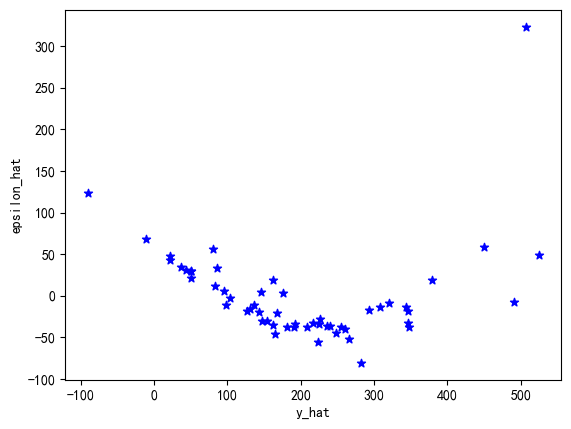

In [15]:
# 残差图
plt.scatter(Y_hat, e_hat, marker='*', color='blue')
plt.xlabel('y_hat')
plt.ylabel('epsilon_hat')

((array([-2.23362047, -1.86703686, -1.65126333, -1.49286247, -1.36497291,
         -1.25618214, -1.16051715, -1.07443739, -0.99566063, -0.92262351,
         -0.85420428, -0.78956785, -0.72807355, -0.66921719, -0.61259326,
         -0.55786922, -0.50476762, -0.45305319, -0.40252348, -0.35300167,
         -0.30433122, -0.25637157, -0.20899478, -0.16208275, -0.11552493,
         -0.06921631, -0.02305574,  0.02305574,  0.06921631,  0.11552493,
          0.16208275,  0.20899478,  0.25637157,  0.30433122,  0.35300167,
          0.40252348,  0.45305319,  0.50476762,  0.55786922,  0.61259326,
          0.66921719,  0.72807355,  0.78956785,  0.85420428,  0.92262351,
          0.99566063,  1.07443739,  1.16051715,  1.25618214,  1.36497291,
          1.49286247,  1.65126333,  1.86703686,  2.23362047]),
  array([-1.37304552, -0.93293363, -0.86821254, -0.81268968, -0.76406352,
         -0.67850751, -0.66603543, -0.64383681, -0.64351492, -0.63777735,
         -0.63291665, -0.62248785, -0.61010999, -

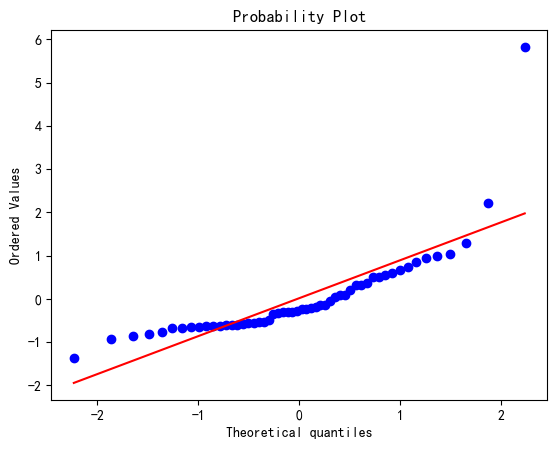

In [16]:
# 正态QQ图
R_sort = sorted(R)
stats.probplot(R_sort, plot=plt)

## 以下进行Box-Cox变换

In [17]:
# 似然函数SSE(lanbda;Z)
def SSE_lambda_z(y, lam, X):
    n = len(y)
    if lam == 0:
        Z = np.log(y)*(np.prod(y, dtype=object))**(1/n)
    else:
        y_lambda = ((y**lam) - 1)/lam
        Z = y_lambda / ( (np.prod(y, dtype=object))**( (lam-1)/n) )
    Z_t = Z.T
    X_t = X.T
    M = X @ np.linalg.inv(X_t @ X) @ X_t
    I = np.eye(n)
    SSE = Z_t @ (I-M) @ Z
    return Z, SSE

Text(0, 0.5, 'SSE')

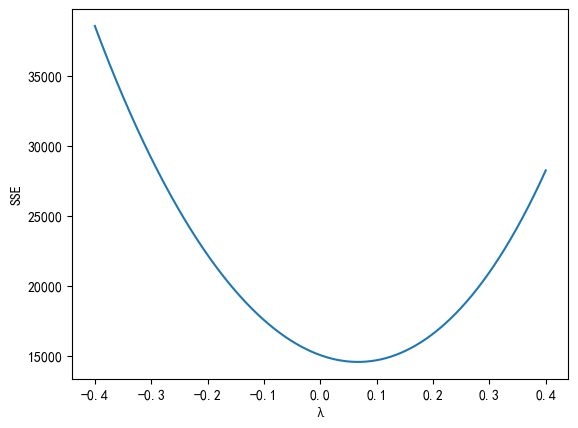

In [18]:
lam = np.linspace(-0.4, 0.4, 1000)
SSE = []
for l in lam: 
    z, s = SSE_lambda_z(Y, l, X)
    SSE.append(s)
plt.plot(lam, SSE)
plt.xlabel('λ')
plt.ylabel('SSE')

In [19]:
from scipy.optimize import minimize

def opt(lam, y=Y, x=X):
    z, s = SSE_lambda_z(y, lam, x)
    return s

# 计算λ值
result = minimize(opt, 2)
lambda_best = round(result.x[0], 2)
print('计算得到使似然函数SSE(λ;Z)最小的λ=', round(lambda_best, 2))

计算得到使似然函数SSE(λ;Z)最小的λ= 0.07


In [20]:
# 进行box-cox变换
y_boxcox = stats.boxcox(Y, 0.07)
y_boxcox

array([6.41446275, 5.44780099, 6.4431769 , 5.44780099, 7.81326449,
       5.12843027, 5.12843027, 5.76677165, 6.42888592, 6.43604778,
       7.14840646, 4.84829124, 8.58277241, 7.15296047, 6.16335798,
       6.53301133, 5.24275971, 3.99972862, 6.51952199, 6.19706811,
       5.55337879, 5.8631088 , 4.9478079 , 6.55303011, 6.8864666 ,
       5.94388753, 6.270326  , 7.9999607 , 4.98577308, 6.24629066,
       4.96691482, 4.69628355, 5.64000553, 6.98536376, 5.62793292,
       6.29399368, 5.66386312, 5.68734758, 6.01121536, 5.98272368,
       5.36338343, 5.04092088, 7.73230558, 6.02991878, 6.34785191,
       5.72190053, 7.06415337, 7.4359839 , 6.07570073, 7.05934073,
       5.73324415, 5.74450302, 6.39990481, 7.07373562])

In [21]:
# 回归系数计算（变换后的的因变量与X1~X2拟合线性回归模型）
model2 = sm.OLS(y_boxcox, X)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     451.8
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           5.29e-38
Time:                        17:38:02   Log-Likelihood:                 27.372
No. Observations:                  54   AIC:                            -44.74
Df Residuals:                      49   BIC:                            -34.80
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4525      0.162      2.786      0.008       0.126       0.779
x1             0.2260      0.018     12.851      0.000       0.191       0.261
x2             0.0305      0.001     21.575      0.000       0.028       0.033
x3             0.0310      0.001     24.227      0.000       0.028       0.034
x4             0.0149      0.031      0.475      0.637      -0.048       0.078
==============================================================================
Omnibus:                        9.932   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.038
Skew:                           0.728   Prob(JB):                      0.00401
Kurtosis:                       4.669   Cond. No.                         800.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
y_0 = stats.boxcox(Y)
model2 = sm.OLS(y_boxcox, X)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     451.8
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           5.29e-38
Time:                        17:39:21   Log-Likelihood:                 27.372
No. Observations:                  54   AIC:                            -44.74
Df Residuals:                      49   BIC:                            -34.80
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4525      0.162      2.786      0.008       0.126       0.779
x1             0.2260      0.018     12.851      0.000       0.191       0.261
x2             0.0305      0.001     21.575      0.000       0.028       0.033
x3             0.0310      0.001     24.227      0.000       0.028       0.034
x4             0.0149      0.031      0.475      0.637      -0.048       0.078
==============================================================================
Omnibus:                        9.932   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.038
Skew:                           0.728   Prob(JB):                      0.00401
Kurtosis:                       4.669   Cond. No.                         800.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
e_hat = results2.resid
SSE = sum(e_hat**2)
SSE

1.1471961818468965

In [22]:
# 计算学生化残差
z_hat = results2.predict()
ez_hat = results2.resid
SSE = sum((ez_hat)**2)
s2_z_hat = SSE/(n-4)

H = X @ np.linalg.inv(X.T @ X) @ X.T
h = np.diagonal(H)

r = np.array([ez_hat[i]/np.sqrt(s2_z_hat*(1-h[i])) for i in range(len(y_hat))])
r

array([ 4.61930734e-02, -1.88681138e-01, -1.81386512e-01,  2.40609398e-03,
       -1.05662568e-01, -3.30427442e-01,  1.99389381e-02, -9.89298964e-01,
       -2.33995700e+00, -8.28169959e-01,  5.19444000e-01, -2.34617550e-01,
        2.14661789e+00,  4.87543321e-01, -3.24015719e-01,  5.47990202e-02,
       -4.99837247e-01, -9.88002798e-01, -2.46245361e-02, -1.50481020e-02,
       -4.00376879e-01,  3.22162089e+00,  3.35318687e-01,  1.96052890e-01])

Text(0, 0.5, 'epsilonz_hat')

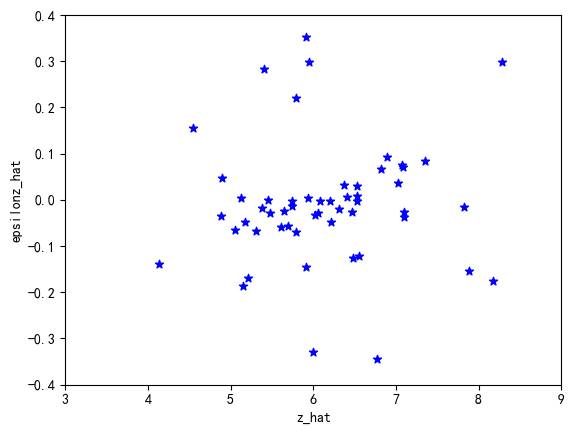

In [23]:
# 残差图
plt.scatter(z_hat, ez_hat, marker='*', color='blue')
plt.xlim([3, 9])
plt.ylim([-0.4, 0.4])
plt.xlabel('z_hat')
plt.ylabel('epsilonz_hat')

((array([-1.90380091, -1.48287381, -1.22601535, -1.03156092, -0.8698858 ,
         -0.7282709 , -0.59996024, -0.48085763, -0.36822879, -0.26009875,
         -0.154935  , -0.05146182,  0.05146182,  0.154935  ,  0.26009875,
          0.36822879,  0.48085763,  0.59996024,  0.7282709 ,  0.8698858 ,
          1.03156092,  1.22601535,  1.48287381,  1.90380091]),
  array([-2.33995700e+00, -9.89298964e-01, -9.88002798e-01, -8.28169959e-01,
         -4.99837247e-01, -4.00376879e-01, -3.30427442e-01, -3.24015719e-01,
         -2.34617550e-01, -1.88681138e-01, -1.81386512e-01, -1.05662568e-01,
         -2.46245361e-02, -1.50481020e-02,  2.40609398e-03,  1.99389381e-02,
          4.61930734e-02,  5.47990202e-02,  1.96052890e-01,  3.35318687e-01,
          4.87543321e-01,  5.19444000e-01,  2.14661789e+00,  3.22162089e+00])),
 (0.9614026830282235, -0.017507150806335185, 0.8896816732090388))

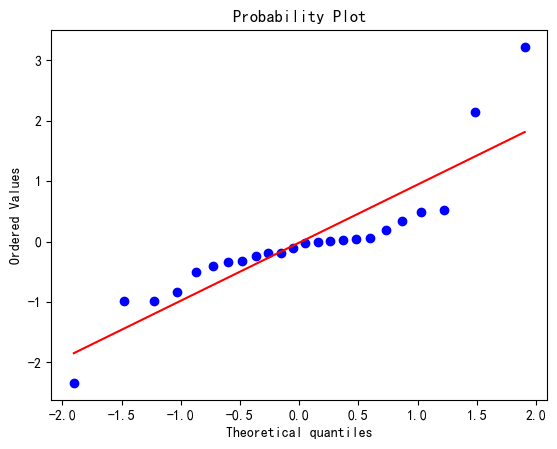

In [24]:
# 正态QQ图
r_sort = sorted(r)
stats.probplot(r_sort, plot=plt)

In [35]:
z, lamda =stats.boxcox(Y)
lamda

-0.12366988310257622

# 例2.9 穷举法

In [25]:
filename = 'eg2_8data.xls'
data = pd.read_excel(filename, header=None, names=['x1', 'x2', 'x3', 'x4', 'y'])
data.head()

,x1,x2,x3,x4,y
0,6.7,62,81,2.59,200
1,5.1,59,66,1.70,101
2,7.4,57,83,2.16,204
3,6.5,73,41,2.01,101
4,7.8,65,115,4.30,509


In [26]:
Y = data['y'].values
column = ['x1', 'x2', 'x3', 'x4']

In [27]:
Z = stats.boxcox(Y, 0.07)
X = sm.add_constant(data[column].values)
model0 = sm.OLS(Z, X)
results0 = model0.fit()
results0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     451.8
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           5.29e-38
Time:                        10:31:35   Log-Likelihood:                 27.372
No. Observations:                  54   AIC:                            -44.74
Df Residuals:                      49   BIC:                            -34.80
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4525      0.162      2.786      0.008       0.126       0.779
x1             0.2260      0.018     12.851      0.000       0.191       0.261
x2             0.0305      0.001     21.575      0.000       0.028       0.033
x3             0.0310      0.001     24.227      0.000       0.028       0.034
x4             0.0149      0.031      0.475      0.637      -0.048       0.078
==============================================================================
Omnibus:                        9.932   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.038
Skew:                           0.728   Prob(JB):                      0.00401
Kurtosis:                       4.669   Cond. No.                         800.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
n = len(Y)

Z_hat0 = results0.predict()
Z_bar0 = Z.mean()

SST0 = sum((Z-Z_bar0)**2)
SSE0 = sum((Z-Z_hat0)**2)
MSE0 = SSE0/(n-len(column)-1)

In [29]:
# 计算修正的复相关系数
def R2_p(MSE_p, n=len(Y), SST=SST0):
    R = 1 - MSE_p/(SST/(n-1))
    return R

In [30]:
# 计算Cp统计量
def Cp(SSE_p, p, n=len(Y), MSE=MSE0):
    Cp = (SSE_p/MSE) - (n-2*p)
    return Cp

In [31]:
# 计算预测平方和PRESSp
def PRESSp(e_p, h):
    PRESS_p = sum((e_p/(1-h))**2)
    return PRESS_p

In [32]:
from itertools import combinations

df = pd.DataFrame(data=None, columns=['模型中的自变量', 'p', 'R_a^2(p)', 'C_p', 'PRESS_p'])

k = 1
for i in range(1, 5):
    combination = combinations(column, i)
    for lists in combination:
        p = i+1
        lists = list(lists)

        # 回归拟合
        X_p = sm.add_constant(data[lists].values)
        model_p = sm.OLS(Z, X_p)
        results_p = model_p.fit()
        Zhat_p = results_p.predict()
        
        # 计算复相关系数、C_p统计量、预测平方和
        e_p = Z-Zhat_p
        SSE_p = sum(e_p**2)
        MSE_p = SSE_p/(n-p)
        H = X_p @ np.linalg.inv(X_p.T @ X_p) @ X_p.T
        h = np.diagonal(H)

        
        R_p = R2_p(MSE_p)
        C_p = Cp(SSE_p, p)
        PRESS_p = PRESSp(e_p, h)
        # 加入表格        
        var = ''
        for k in lists:
            var += k
            var += ' '
        df.loc[len(df)] = [var, p, R_p, C_p, PRESS_p]
df

,模型中的自变量,p,R_a^2(p),C_p,PRESS_p
0,x1,2,0.106459,1577.392979,41.503883
1,x2,2,0.340304,1151.494668,31.289492
2,x3,2,0.428052,991.681281,26.721350
3,x4,2,0.526534,812.316655,21.820919
4,x1 x2,3,0.420188,987.695140,28.708193
5,x1 x3,3,0.632379,608.667962,17.569325
6,x1 x4,3,0.517628,813.642407,22.789410
7,x2 x3,3,0.803195,303.545540,9.269566
8,x2 x4,3,0.643457,588.878512,16.985049
9,x3 x4,3,0.678140,526.925300,15.441686
